In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn import svm
%matplotlib inline

In [46]:
labeled_images=pd.read_csv('E:\Jupyter/DigitRec/train.csv')
images = labeled_images.iloc[0:5000,1:]
labels = labeled_images.iloc[0:5000,:1]
train_images,test_images,train_labels,test_labels=train_test_split(images,labels,train_size=0.8,random_state=0)

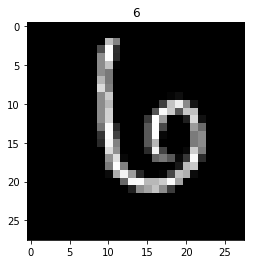

In [49]:

i=1
img=train_images.iloc[i].as_matrix()
img=img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train_labels.iloc[i,0])


(array([ 682.,    9.,   10.,    7.,   10.,   18.,    7.,   17.,    7.,   17.]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]),
 <a list of 10 Patch objects>)

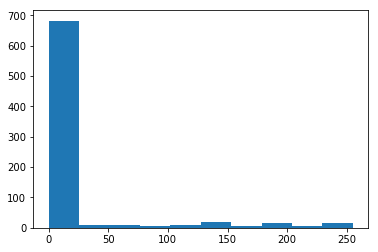

In [50]:
plt.hist(train_images.iloc[i])

E:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
E:\Anaconda\lib\site-packages\pandas\core\frame.py:2454: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)
E:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from 

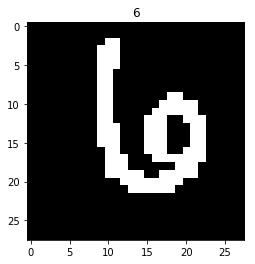

In [56]:
test_images[test_images>0]=1
train_images[train_images>0]=1
img=train_images.iloc[i].as_matrix().reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train_labels.iloc[i,0])

(array([ 668.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  116.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

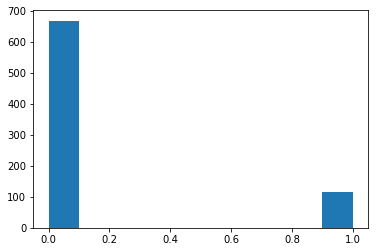

In [59]:
plt.hist(train_images.iloc[i])

In [61]:
clf=svm.SVC()
clf.fit(train_images,train_labels.values.ravel())
clf.score(test_images,test_labels)

0.88700000000000001

In [62]:
test_data=pd.read_csv('E:\Jupyter\DigitRec/test.csv')
test_data[test_data>0]=1
results=clf.predict(test_data[0:5000])

In [63]:
results

array([2, 0, 9, ..., 1, 7, 3], dtype=int64)

In [64]:
df = pd.DataFrame(results)
df.index.name='ImageId'
df.index+=1
df.columns=['Label']
df.to_csv('results.csv', header=True)
df

,Label
1,2
2,0
3,9
4,9
5,2
6,7
7,0
8,3
9,0
10,3
